In [1]:
import pandas as pd
import numpy as np
from astropy.units import Quantity
from astropy.cosmology import LambdaCDM

from xga.relations.fit import scaling_relation_lira

In [2]:
sample = pd.read_csv('../../useful_samples/lovisari_xray.csv')
sample

,PLCKESZ,z,M500,E_M500,e_M500,Mg500,E_Mg500,e_Mg500,kT,E_kT,...,E_Lbolexc,e_Lbolexc,NT,fT,Nsb,fsb,Simbad,NED,_RA,_DE
0,G000.44-41.83,0.165,5.01,0.55,0.48,6.61,0.36,0.33,5.85,0.32,...,0.47,0.47,6,1.00,20,1.21,Simbad,NED,316.051,-41.325
1,G002.74-56.18,0.141,4.96,0.43,0.28,5.63,0.21,0.14,5.36,0.12,...,0.23,0.23,10,0.94,49,1.08,Simbad,NED,334.681,-38.892
2,G003.90-59.41,0.151,6.94,0.19,0.19,8.65,0.08,0.08,7.06,0.13,...,0.43,0.43,10,0.98,63,1.08,Simbad,NED,338.618,-37.752
3,G006.70-35.54,0.089,2.42,0.04,0.03,4.27,0.05,0.08,4.72,0.08,...,0.21,0.21,15,1.14,45,1.18,Simbad,NED,308.691,-35.810
4,G006.78+30.46,0.203,17.56,0.28,0.27,32.00,0.24,0.22,14.37,0.12,...,0.84,0.84,19,1.26,171,1.62,Simbad,NED,243.952,-6.132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,G336.59-55.44,0.097,3.78,0.71,0.52,4.88,0.46,0.36,4.69,0.24,...,0.15,0.15,20,1.05,23,1.19,Simbad,NED,341.597,-52.720
116,G337.09-25.97,0.260,5.75,0.50,0.41,8.94,0.34,0.30,5.67,0.22,...,0.28,0.28,5,0.56,21,1.16,Simbad,NED,288.583,-59.513
117,G342.31-34.90,0.232,6.85,0.74,0.62,9.49,0.45,0.40,6.48,1.07,...,1.71,1.71,2,0.59,13,0.92,Simbad,NED,305.801,-55.593
118,G347.18-27.35,0.237,8.24,0.63,0.73,11.07,0.43,0.50,8.31,0.40,...,0.81,0.81,8,0.96,24,1.21,Simbad,NED,293.715,-50.867


In [3]:
sample.columns

Index(['PLCKESZ', 'z', 'M500', 'E_M500', 'e_M500', 'Mg500', 'E_Mg500',
       'e_Mg500', 'kT', 'E_kT', 'e_kT', 'kTexc', 'E_kTexc', 'e_kTexc', 'LX',
       'E_LX', 'e_LX', 'LXexc', 'E_LXexc', 'e_LXexc', 'Lbol', 'E_Lbol',
       'e_Lbol', 'Lbolexc', 'E_Lbolexc', 'e_Lbolexc', 'NT', 'fT', 'Nsb', 'fsb',
       'Simbad', 'NED', '_RA', '_DE'],
      dtype='object')

In [4]:
cosmo = LambdaCDM(70, 0.3, 0.7)

In [5]:
efunc = cosmo.efunc(sample['z'].values)
tx = Quantity(sample[['kT', 'e_kT', 'E_kT']].values, 'keV')
mgas = Quantity(sample[['Mg500', 'e_Mg500', 'E_Mg500']].values*1e+13, 'Msun')*efunc[..., None]

t_norm = np.median(tx[:, 0])
mg_norm = np.median(mgas[:, 0])
print(t_norm)
print(mg_norm.to('1e+13Msun'))

6.265000000000001 keV
8.788019248047677 1e+13 solMass


tx[:, 0], tx[:, 1:], lx[:, 0], lx[:, 1:], t_norm, l_norm, 
                            y_name=r'$E(z)T_{\rm{X,500}}$', 
                            x_name=r'$L^{0.1-2.4keV}_{\rm{X,500}}$'

In [6]:
mgas_tx = scaling_relation_lira(mgas[:, 0], mgas[:, 1:], tx[:, 0], tx[:, 1:], mg_norm, t_norm, 
                                y_name=r"$E(z)M^{\rm{gas}}_{500}$", x_name=r"$T_{\rm{X,500}}$", dim_hubb_ind=1)

R[write to console]: module mix loaded



  |**************************************************| 100%


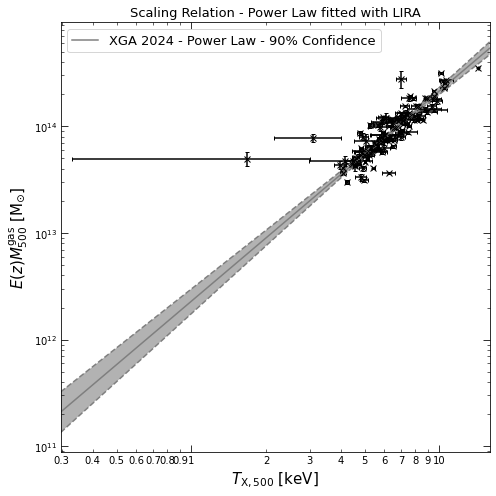

In [7]:
mgas_tx.view(figsize=(7, 7))

In [8]:
mgas_tx.par_names

['slope', 'norm']

In [9]:
mgas_tx.pars

array([[1.97088387, 0.08826349],
       [0.97293563, 0.02123864]])

In [15]:
mgas_tx.y_norm

<Quantity 8.78801925e+13 solMass>

In [13]:
mgas_tx.x_norm.value

6.265000000000001

Removed no burn in


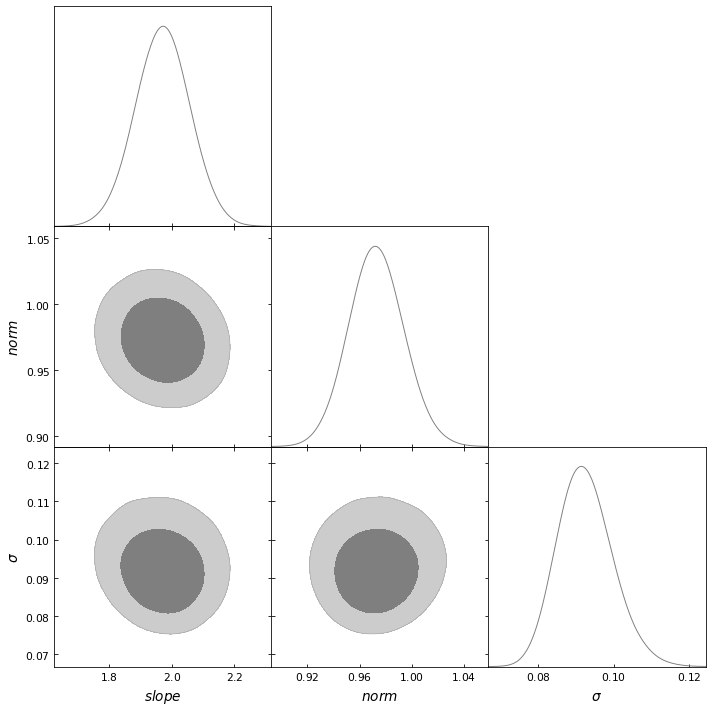

In [10]:
mgas_tx.view_corner()

In [11]:
# t_l.save('lovisari_T500vsL_0.12.4_500_xgav0.4.xgarel')